In [1]:
import numpy as np
import pandas as pd

In [2]:
orders=pd.read_csv('data_orders.csv')

In [3]:
offers=pd.read_csv('data_offers.csv')

In [4]:
orders.shape

(10716, 8)

In [5]:
offers.shape

(334363, 2)

In [6]:
orders.sample(n=5, random_state=28)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
7727,12:46:29,-1.000625,51.443332,NaN,3000579226355,4,0,9.0
5957,21:05:39,-0.971480,51.458364,NaN,3000623116765,4,0,20.0
131,09:12:33,-0.956827,51.452408,NaN,3000622819606,4,0,158.0
8644,07:59:23,-0.972893,51.456873,716.0,3000592771740,4,1,142.0
7165,00:12:42,-0.976101,51.433817,NaN,3000590782127,4,0,42.0


In [7]:
offers.sample(n=5, random_state=28)

,order_gk,offer_id
173997,3000594172132,300051464445
82269,3000583616173,300051016738
30971,3000625641786,300051994957
208594,3000623666517,300051859597
260556,3000617529330,300051724681


In [8]:
df=orders.merge(right=offers,how="inner",on="order_gk")

In [9]:
 df.sample(n=5, random_state=28)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
25912,07:12:18,-0.972735,51.452489,NaN,3000583416366,4,0,78.0,300050993053
25482,20:56:32,-0.954167,51.438361,NaN,3000593096569,4,0,191.0,300051405707
4515,18:03:09,-0.950303,51.445155,NaN,3000627382353,4,0,172.0,300052078581
26781,15:21:34,-0.960031,51.455450,179.0,3000557936901,4,1,385.0,300050788593
30249,10:24:06,-0.945107,51.444834,119.0,3000555445693,4,1,141.0,300050711523


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31268 entries, 0 to 31267
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 31268 non-null  object 
 1   origin_longitude               31268 non-null  float64
 2   origin_latitude                31268 non-null  float64
 3   m_order_eta                    8364 non-null   float64
 4   order_gk                       31268 non-null  int64  
 5   order_status_key               31268 non-null  int64  
 6   is_driver_assigned_key         31268 non-null  int64  
 7   cancellations_time_in_seconds  21795 non-null  float64
 8   offer_id                       31268 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 2.1+ MB


In [12]:
df.isna().sum()

order_datetime                       0
origin_longitude                     0
origin_latitude                      0
m_order_eta                      22904
order_gk                             0
order_status_key                     0
is_driver_assigned_key               0
cancellations_time_in_seconds     9473
offer_id                             0
dtype: int64

In [13]:
df.to_csv('merge_data_orders_offers.csv')

In [14]:
df["is_driver_assigned"] = np.where(df["is_driver_assigned_key"] == 1, "Yes", "No")

In [15]:
df["order_status"] = np.where(df["order_status_key"] == 4, "Client Cancelled", "System Reject")

In [16]:
df.drop(columns=["is_driver_assigned_key", "order_status_key"], inplace=True)

In [17]:
df.head(3)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client Cancelled
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client Cancelled
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client Cancelled


In [18]:
 df = df.rename(columns={"order_datetime": "order_time"})

## Distribution of Orders by Reason for Failure 

In [19]:
 df.groupby(by=["is_driver_assigned", "order_status"])["order_gk"].count()

is_driver_assigned  order_status    
No                  Client Cancelled    13435
                    System Reject        9469
Yes                 Client Cancelled     8360
                    System Reject           4
Name: order_gk, dtype: int64

In [38]:
order_cancel_df= df.pivot_table(columns=["is_driver_assigned", "order_status"], values="order_gk", aggfunc="count")

In [39]:
order_cancel_df

is_driver_assigned               No                            Yes  \
order_status       Client Cancelled System Reject Client Cancelled   
order_gk                      13435          9469             8360   

is_driver_assigned                
order_status       System Reject  
order_gk                       4

<Axes: title={'center': 'Number of Orders Cancelled by Driver Assigned and Order Status'}, ylabel='Number Of Orders'>

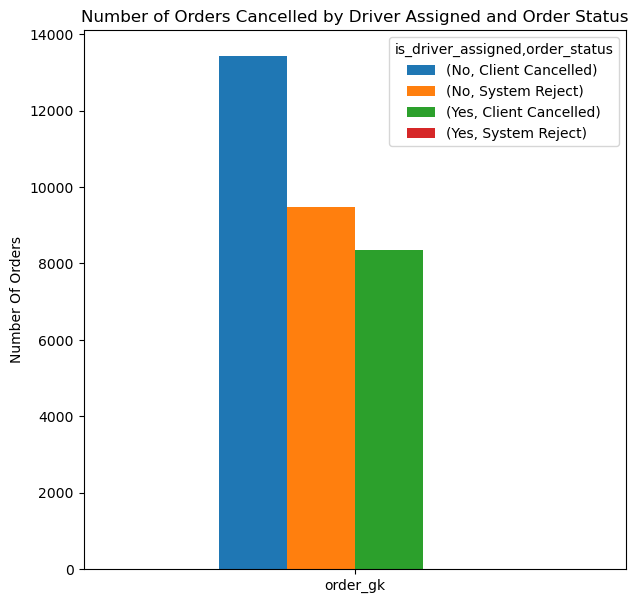

In [40]:
order_cancel_df.plot(kind='bar',subplots=False, figsize=(7, 7), legend=True, rot=0,ylabel='Number Of Orders',title='Number of Orders Cancelled by Driver Assigned and Order Status',use_index=True)

## Distribution of Failed Orders by hours to investigate any visible trends

In [41]:
df["order_hour"] = df["order_time"].str.split(":").apply(lambda split: split[0])

In [42]:
df.sample(4)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,order_hour
30368,14:18:19,-0.966769,51.459496,NaN,3000555522087,58.0,300050716597,No,Client Cancelled,14
12767,19:14:43,-0.955551,51.453125,419.0,3000628708150,62.0,300052178413,Yes,Client Cancelled,19
28743,08:15:18,-0.941621,51.455347,1259.0,3000582792660,219.0,300050969313,Yes,Client Cancelled,08
1197,07:24:51,-0.991569,51.451489,537.0,3000592096415,470.0,300051356015,Yes,Client Cancelled,07


In [45]:
orders_by_hour=df.groupby(by=['order_hour'])['order_gk'].count()

In [46]:
orders_by_hour

order_hour
00    1993
01    1305
02    1475
03    1418
04     227
05     111
06     392
07    1566
08    3865
09    1258
10     387
11     510
12     697
13    1072
14     733
15    1444
16     832
17    1540
18    1136
19     644
20    1381
21    2782
22    2029
23    2471
Name: order_gk, dtype: int64

<Axes: title={'center': 'Count of Failed Orders by Hour of Day'}, xlabel='order_hour'>

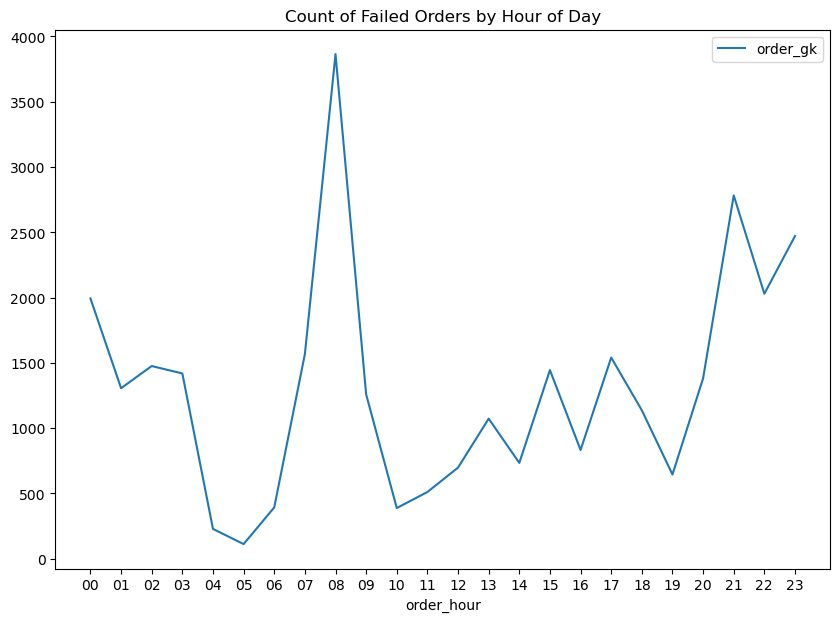

In [47]:
orders_by_hour.plot(figsize=(10, 7),legend=True,xticks=range(0, 24),title="Count of Failed Orders by Hour of Day")

In [48]:
orders_cancel_by_hour=df.groupby(by=['order_hour','is_driver_assigned','order_status'])['order_gk'].count()

In [50]:
print(orders_cancel_by_hour)

order_hour  is_driver_assigned  order_status    
00          No                  Client Cancelled     957
                                System Reject        706
            Yes                 Client Cancelled     326
                                System Reject          4
01          No                  Client Cancelled     633
                                                    ... 
22          No                  System Reject        660
            Yes                 Client Cancelled     415
23          No                  Client Cancelled    1144
                                System Reject        883
            Yes                 Client Cancelled     444
Name: order_gk, Length: 73, dtype: int64


In [61]:
order_cancel_by_hour_pivot= df.pivot_table(index=["order_hour"],columns=["is_driver_assigned", "order_status"], values="order_gk", aggfunc="count")

<Axes: title={'center': 'Count of Failed Orders by Hour of the Day'}, xlabel='Hour of the Day (24 Hr Time Scale)', ylabel='Number of Orders'>

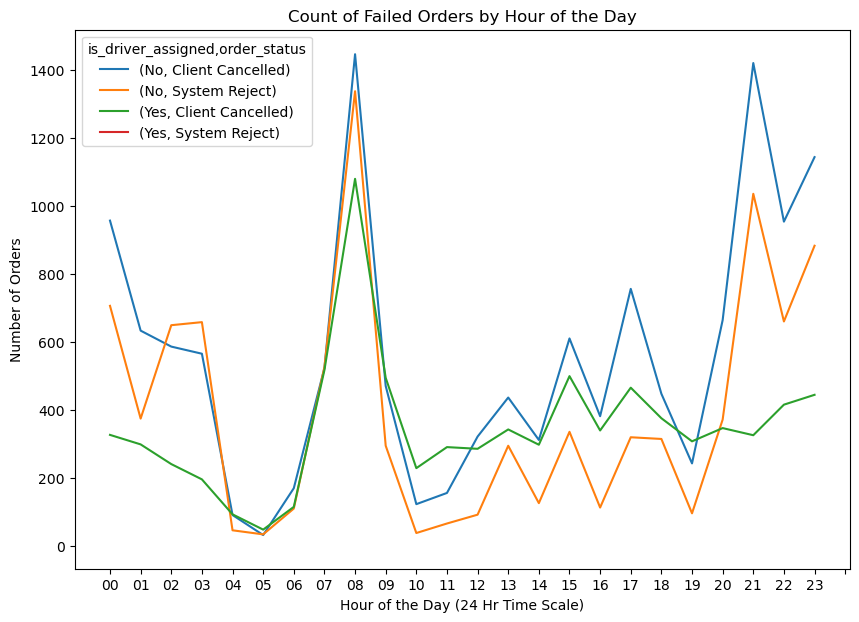

In [75]:
order_cancel_by_hour_pivot.plot(figsize=(10, 7),legend=True,xticks=range(0, 25),
                                title="Count of Failed Orders by Hour of the Day",
                                xlabel='Hour of the Day (24 Hr Time Scale)',ylabel='Number of Orders')

## Examine time for cancellation across variables like driver assigned and order hour.

In [73]:
order_cancel_df=df.groupby(by=['order_hour','is_driver_assigned'])["cancellations_time_in_seconds"].mean()

In [74]:
order_cancel_df

order_hour  is_driver_assigned
00          No                    115.126437
            Yes                   276.082822
01          No                    100.593997
            Yes                   296.312081
02          No                    121.305461
            Yes                   301.466667
03          No                    129.182301
            Yes                   368.682051
04          No                    100.733333
            Yes                   245.250000
05          No                    102.838710
            Yes                   156.617021
06          No                    202.952663
            Yes                   225.508772
07          No                    141.177820
            Yes                   177.640232
08          No                    132.625432
            Yes                   172.896296
09          No                    138.014894
            Yes                   230.821862
10          No                     93.795082
            Yes         

In [80]:
order_cancel_pivot=df.pivot_table(index='order_hour',columns='is_driver_assigned',values='cancellations_time_in_seconds',aggfunc='mean')

<Axes: title={'center': 'Average Time to Cancellation per Order'}, xlabel='order_hour'>

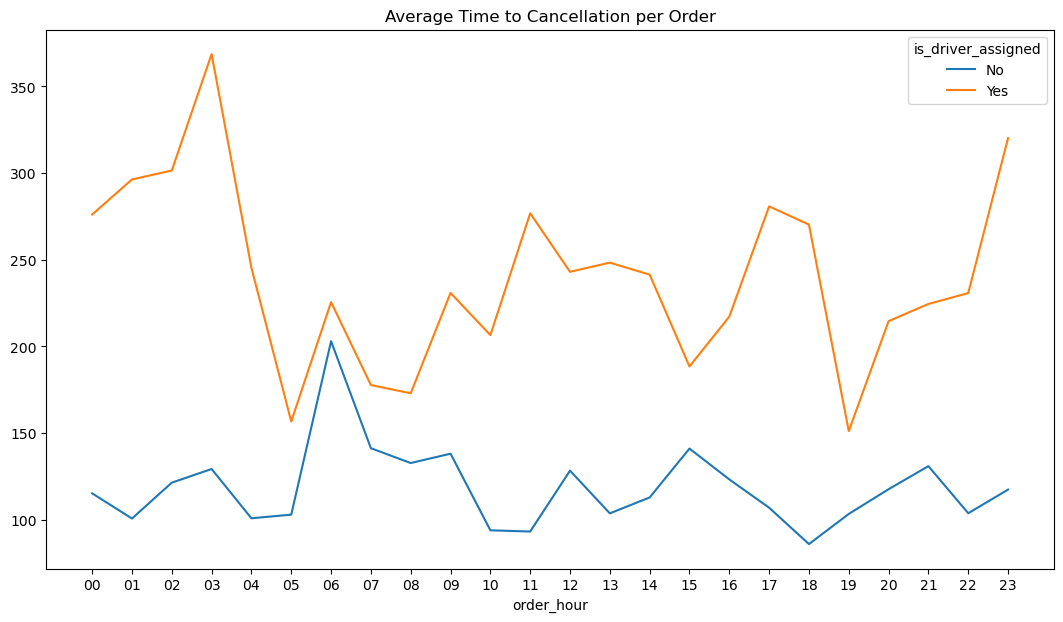

In [81]:
order_cancel_pivot.plot(xticks=range(0, 24),figsize=(13, 7),title='Average Time to Cancellation per Order')

## Examine distribution of Order ETA by hours 

<Axes: title={'center': 'Average ETA per hour'}, xlabel='order_hour'>

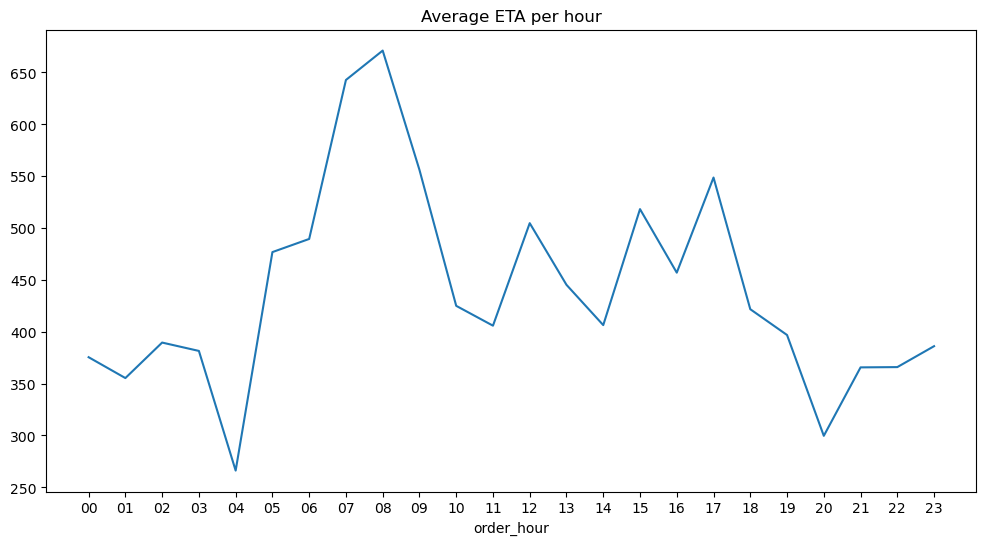

In [82]:
df.groupby(by="order_hour")["m_order_eta"].mean().plot(figsize=(12, 6),xticks=range(0, 24),title="Average ETA per hour")